In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/preprocessed_data_a.csv')
data.head()

,sex,age,OSA,insomnia,"PLMD, RLS",parasomnia,circadian rhythm sleep-wake disorder,"Narcolepsy, EDS, Hypersomnia",Catathrenia,control,...,Lowest SaO2 (%),ODI,90%ODI,EtCO2 (>50mmHg),Total LMI =PLMI(/h),Total LM Arousal#,Total LM AI(/h),PLM Arousal#,PLM AI(/h),MAI(/h)
0,1,55,1,0,0,0,0,0,0,0,...,88.0,0.0,0.0,0.0,3.2,2.0,0.3,0.0,0.0,0.3
1,0,48,1,0,0,0,0,0,0,0,...,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,55,1,0,0,0,0,0,0,0,...,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,50,1,0,0,0,0,0,0,0,...,83.0,0.0,0.0,0.0,46.8,0.0,0.0,0.0,0.0,0.0
4,0,57,1,0,0,0,0,0,0,0,...,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
features = data.drop(data.iloc[:, 2:10], axis=1)
targets = data.iloc[:, 2:10]

# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
# y_train_converted = y_train.apply(lambda y: y.argmax(), axis=1).values

In [21]:
X = features.to_numpy()
X

array([[  1. ,  55. , 150. , ...,   0. ,   0. ,   0.3],
       [  0. ,  48. , 174. , ...,   0. ,   0. ,   0. ],
       [  0. ,  55. , 168. , ...,   0. ,   0. ,   0. ],
       ...,
       [  1. ,  54. , 154. , ...,   5. ,   0.8,   0.8],
       [  1. ,  63. , 154. , ...,  33. ,   5.1,   6.3],
       [  0. ,  62. , 168. , ...,   2. ,   0.6,   3.1]])

In [22]:
Y = targets.to_numpy()
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

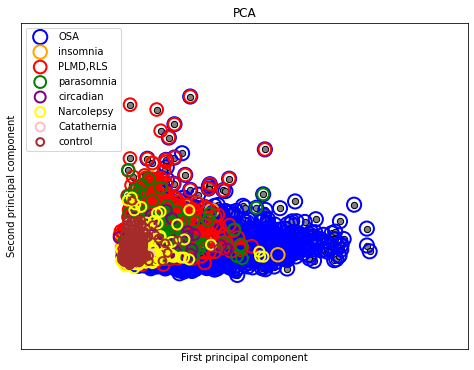

In [33]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler


def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel="linear"))
    classif.fit(X, Y)

#     plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    two_class = np.where(Y[:, 2])
    three_class = np.where(Y[:, 3])
    four_class = np.where(Y[:, 4])
    five_class = np.where(Y[:, 5])
    six_class = np.where(Y[:, 6])
    seven_class = np.where(Y[:, 7])
    
    plt.scatter(X[:, 0], X[:, 1], s=40, c="gray", edgecolors=(0, 0, 0))
    plt.scatter(
        X[zero_class, 0],
        X[zero_class, 1],
        s=200,
        edgecolors="b",
        facecolors="none",
        linewidths=2,
        label="OSA",
    )
    plt.scatter(
        X[one_class, 0],
        X[one_class, 1],
        s=180,
        edgecolors="orange",
        facecolors="none",
        linewidths=2,
        label="insomnia",
    )
    plt.scatter(
        X[two_class, 0],
        X[two_class, 1],
        s=160,
        edgecolors="red",
        facecolors="none",
        linewidths=2,
        label="PLMD,RLS",
    )
    plt.scatter(
        X[three_class, 0],
        X[three_class, 1],
        s=140,
        edgecolors="green",
        facecolors="none",
        linewidths=2,
        label="parasomnia",
    )
    plt.scatter(
        X[four_class, 0],
        X[four_class, 1],
        s=120,
        edgecolors="purple",
        facecolors="none",
        linewidths=2,
        label="circadian",
    )
    plt.scatter(
        X[five_class, 0],
        X[five_class, 1],
        s=100,
        edgecolors="yellow",
        facecolors="none",
        linewidths=2,
        label="Narcolepsy",
    )
    plt.scatter(
        X[six_class, 0],
        X[six_class, 1],
        s=80,
        edgecolors="pink",
        facecolors="none",
        linewidths=2,
        label="Catathernia",
    )
    plt.scatter(
        X[seven_class, 0],
        X[seven_class, 1],
        s=60,
        edgecolors="brown",
        facecolors="none",
        linewidths=2,
        label="control",
    )
    

    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - 0.5 * max_x, max_x + 0.5 * max_x)
    plt.ylim(min_y - 0.5 * max_y, max_y + 0.5 * max_y)
    if subplot == 2:
        plt.xlabel("First principal component")
        plt.ylabel("Second principal component")
        plt.legend(loc="upper left")


plt.figure(figsize=(8, 6))

X = StandardScaler().fit_transform(X)

plot_subfigure(X, Y, 2, "PCA", "pca")

plt.show()

In [35]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, Y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

ValueError: Imbalanced-learn currently supports binary, multiclass and binarized encoded multiclasss targets. Multilabel and multioutput targets are not supported.